In [16]:
import pandas as pd
import matplotlib.pyplot as plt

dati = {
    "Mese": ["Gen", "Feb", "Mar", "Apr"] * 3,
    "Prodotto": ["A"]*4 + ["B"]*4 + ["C"]*4,
    "Quantità": [120, 135, 150, 145,   # A
                 90,  95,  100, 105,    # B
                 60,  65,   70,  80]    # C
}
df = pd.DataFrame(dati)

In [4]:
df


,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
2,Mar,A,150
3,Apr,A,145
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105
8,Gen,C,60
9,Feb,C,65


In [8]:
prodotto_b = df[df["Prodotto"] == "B"]
prodotto_b

,Mese,Prodotto,Quantità
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105


In [7]:
quantita_100 = df[df["Quantità"] == 100]
quantita_100

,Mese,Prodotto,Quantità
6,Mar,B,100


In [10]:
mese_quant_a = df.loc[df["Prodotto"] == "A", ["Mese", "Quantità"]]
mese_quant_a

,Mese,Quantità
0,Gen,120
1,Feb,135
2,Mar,150
3,Apr,145


In [11]:
prodotto_c_settanta = df[(df["Prodotto"] == "C") & (df["Quantità"] == 70)]
prodotto_c_settanta

,Mese,Prodotto,Quantità
10,Mar,C,70


In [12]:
genn_febb = df[df["Mese"].isin(["Gen", "Feb"])]
genn_febb

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
4,Gen,B,90
5,Feb,B,95
8,Gen,C,60
9,Feb,C,65


In [13]:
tra_90_130 = df[df["Quantità"].between(90, 130)]
tra_90_130

,Mese,Prodotto,Quantità
0,Gen,A,120
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
7,Apr,B,105


In [14]:
no_aprile = df[df["Mese"] != "Apr"]
no_aprile

,Mese,Prodotto,Quantità
0,Gen,A,120
1,Feb,A,135
2,Mar,A,150
4,Gen,B,90
5,Feb,B,95
6,Mar,B,100
8,Gen,C,60
9,Feb,C,65
10,Mar,C,70


In [15]:
totali = df.groupby("Prodotto")["Quantità"].sum()
totali

Prodotto
A    550
B    390
C    275
Name: Quantità, dtype: int64

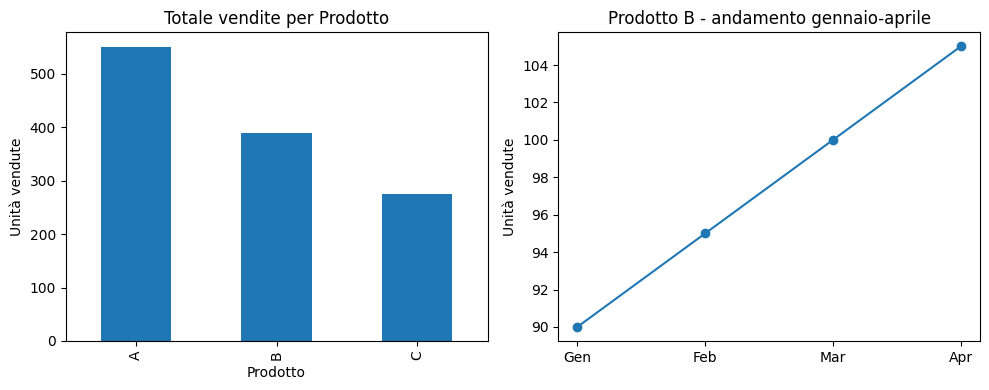

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

totali.plot(kind="bar", ax=axes[0])
axes[0].set_title("Totale vendite per Prodotto")
axes[0].set_ylabel("Unità vendute")

prod_b = df[df["Prodotto"] == "B"]
axes[1].plot(prod_b["Mese"], prod_b["Quantità"], marker="o")
axes[1].set_title("Prodotto B - andamento gennaio-aprile")
axes[1].set_ylabel("Unità vendute")

plt.tight_layout()


In [29]:
totale_per_mese = df.groupby("Mese")["Quantità"].sum()
totale_per_mese

Mese
Apr    330
Feb    295
Gen    270
Mar    320
Name: Quantità, dtype: int64

In [35]:
df_filtrato = df[((df["Prodotto"] == "A") & (df["Quantità"] > 130)) | ((df["Prodotto"] == "C") & (df["Quantità"] < 70))]
df_filtrato 

,Mese,Prodotto,Quantità
1,Feb,A,135
2,Mar,A,150
3,Apr,A,145
8,Gen,C,60
9,Feb,C,65


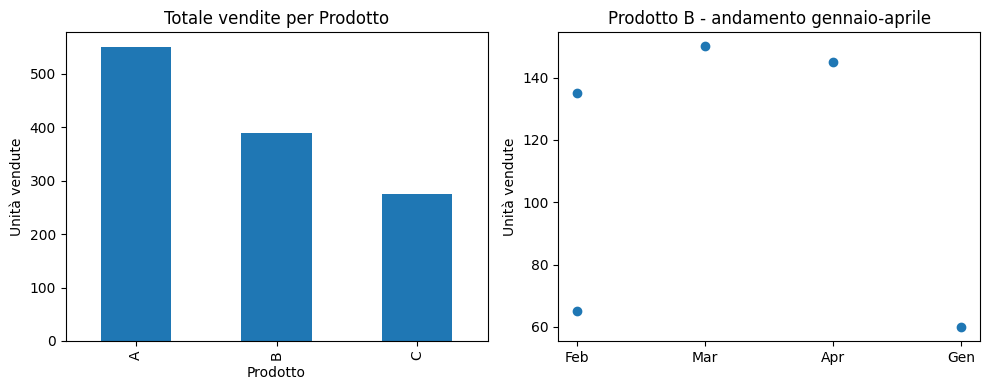

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

totali.plot(kind="bar", ax=axes[0])
axes[0].set_title("Totale vendite per Prodotto")
axes[0].set_ylabel("Unità vendute")

prod_b = df[df["Prodotto"] == "B"]
axes[1].scatter(df_filtrato["Mese"], df_filtrato["Quantità"])
axes[1].set_title("Prodotto B - andamento gennaio-aprile")
axes[1].set_ylabel("Unità vendute")

plt.tight_layout()